# PowerGAMA
## Europe 2014 model example
This is an example of PowerGAMA using the openly available 2014 Europe dataset by Rye et al., available from
http://dx.doi.org/10.5281/zenodo.54580. This dataset is also included with the source code in the "examples" folder

### Part 1: Data input and simulation


In [ ]:
%load_ext autoreload
%autoreload 2
# The next line is to ensure inline plots in this notebook
%matplotlib inline

import pathlib
import powergama
import powergama.plots as pgp
from IPython.core.display import HTML


Define some parameters:
* timerange = range to include in present simulation (refering to rows in the time-series input files) to include in the . In this case, a short range of 24 hours is used
* datapath = path to input files
* sqlfile = name of sqlite3 file storing all results

In [3]:
timerange = range(0,24)
datapath = pathlib.Path().parent/"test_data/data_europe2014"
solver="glpk"
sqlfile = "results_db_europe2014.sqlite3"

In [4]:
data = powergama.GridData()
data.readGridData(nodes=datapath/"2014_nodes.csv",
                  ac_branches=datapath/"2014_branches.csv",
                  dc_branches=datapath/"2014_hvdc.csv",
                  generators=datapath/"2014_generators.csv",
                  consumers=datapath/"2014_consumers.csv")
data.readProfileData(filename=datapath/"profiles.csv",
            storagevalue_filling=datapath/"profiles_storval_filling.csv",
            storagevalue_time=datapath/"profiles_storval_time.csv",
            timerange=timerange, 
            timedelta=1.0)

Now, solve the problem
This may take some time.

In [5]:
lp = powergama.LpProblem(data)
res = powergama.Results(data,sqlfile,replace=True)
lp.solve(res,solver="glpk")

Computing B and DA matrices...
Found synchronous area (size = 1530), using ref node = Zemblak
Found synchronous area (size = 2), using ref node = DK-Zealand
Found synchronous area (size = 1), using ref node = GB-Sellindge
Found synchronous area (size = 1), using ref node = GB-Isle of Grain
Found synchronous area (size = 1), using ref node = NO-Kristiansand
Found synchronous area (size = 1), using ref node = NO-Feda
Found synchronous area (size = 1), using ref node = SE-Lindome
Found synchronous area (size = 1), using ref node = SE-Kruseberg
Found synchronous area (size = 1), using ref node = SE-Starno
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "c:\Users\hsven\code\powergama\tests\results_db_europe2014.sqlite3"
:) Found solver here: C:\Users\hsven\bin\glpsol.exe
Solving...
4% 8% 12% 16% 20% 25% 29% 33% 37% 41% 45% 50% 54% 58% 62% 66% 70% 75% 79% 83% 87% 91% 95% 100% 

In [40]:
print("System cost",sum(res.getSystemCost(timeMaxMin=[4,6]).values()))
print("Mean area price",sum(res.getAreaPricesAverage(timeMaxMin=[4,6]).values())/len(res.getAreaPricesAverage()))


System cost 9984938.213366672
Mean area price 58.267524372667154


### Part 2: Analyse results
Plot some results
These plots are examples, more plots and methods to analyse results are available

Getting energy output from all generators...


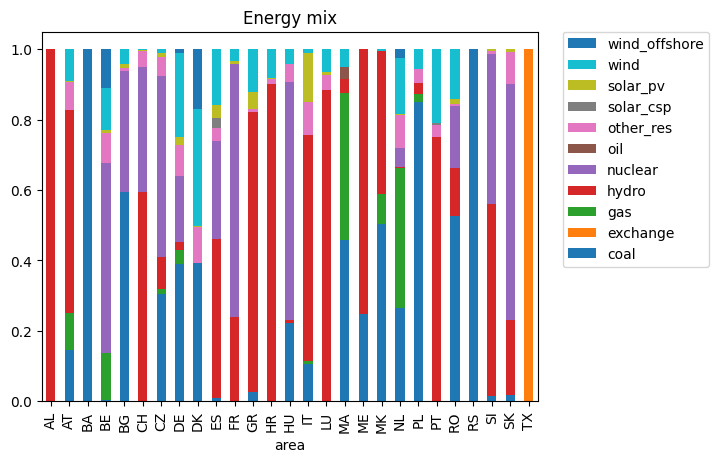

type,coal,exchange,gas,hydro,nuclear,oil,other_res,solar_csp,solar_pv,wind,wind_offshore
area,,,,,,,,,,,
AL,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT,0.144230,NaN,0.106393,0.576704,NaN,0.000000,0.079905,NaN,0.002089,0.090678,NaN
BA,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,0.004198,NaN,0.133201,0.000000,0.540416,0.000000,0.083539,NaN,0.009423,0.119909,0.109315
BG,0.593160,NaN,0.000000,0.000000,0.345804,0.000000,0.006279,NaN,0.013402,0.041355,NaN
CH,NaN,NaN,0.000000,0.594320,0.354380,NaN,0.046362,NaN,0.002823,0.002115,NaN
CZ,0.304185,NaN,0.015813,0.090557,0.512664,NaN,0.054514,NaN,0.010755,0.011513,NaN
DE,0.389159,NaN,0.040320,0.022208,0.188647,0.000000,0.087943,NaN,0.021319,0.238528,0.011876
DK,0.393463,NaN,0.000000,0.000137,NaN,0.000000,0.100758,NaN,0.002695,0.332530,0.170417


In [14]:
res.plotEnergyMix(relative=True)

In [9]:
#res.plotMapGrid(nodetype='nodalprice',dotsize=20)
#res.plotMapGrid(nodetype='nodalprice',branchtype='utilisation',dotsize=20,latlon=[45,0,55,15],draw_par_mer=True)

In [15]:
m=pgp.plotMap(data,res,nodetype="nodalprice",branchtype="utilisation")

#display map using html iframe (so it is visible when viewing notebook on github)
srcdoc = m.get_root().render().replace('"', '&quot;')
embed = HTML('<iframe srcdoc="{}" style="height: {}px; display:block; width:100%; border:0"></iframe>'.format(
    srcdoc, 500))
embed

c:\Users\hsven\AppData\Local\pypoetry\Cache\virtualenvs\powergama-l7rGy6sI-py3.11\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


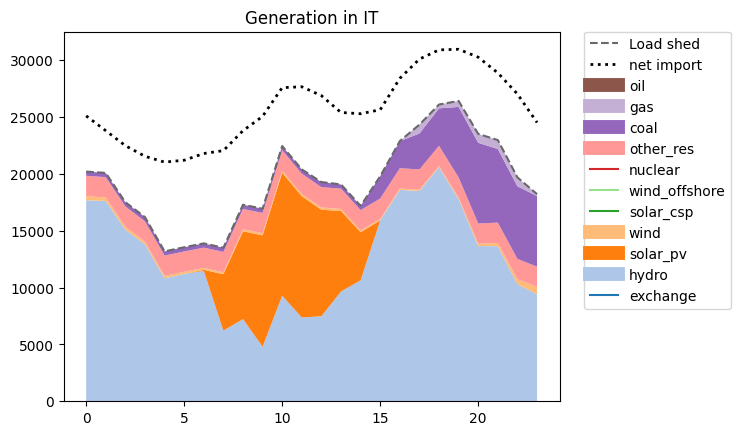

In [17]:
res.plotGenerationPerArea(area='IT')

Generator with storage:

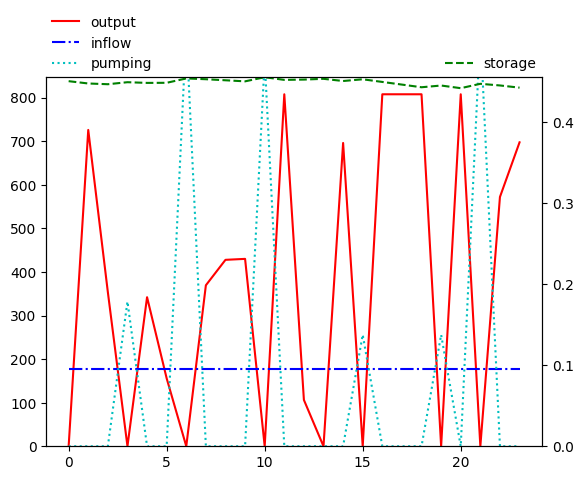

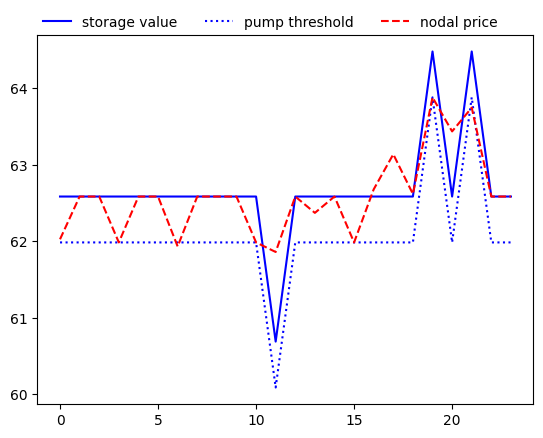

In [22]:
the_generator = 525
res.plotGeneratorOutput(the_generator,showTitle=False)
res.plotStorageValues(the_generator,showTitle=False)

In [20]:
#res.plotTimeseriesColour(areas=['DE','FR','IT'],value='nodalprice')